# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [1]:
pwd

'/Users/kev_weis/Desktop/GuidedCapstone2'

**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os as os
import matplotlib.pyplot as plt

In [3]:
cd /Users/kev_weis/Desktop/GuidedCapstone2/data/

/Users/kev_weis/Desktop/GuidedCapstone2/data


In [4]:
pwd

'/Users/kev_weis/Desktop/GuidedCapstone2/data'

In [5]:
step2data = pd.read_csv('step2_out.csv')

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [6]:
df = pd.DataFrame(step2data)

In [7]:
df.shape

(330, 28)

In [8]:
pd.set_option('display.max_columns', None)
df.describe()

,Unnamed: 0,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,164.500000,4591.818182,1215.427273,3374.000000,0.172727,57.903801,0.184848,1.018182,0.933333,1.50000,1.833333,2.621212,8.266667,49.025502,20.173640,3.155514,734.122157,166.541762,115.103943,63.812436,182.337743,57.916957,64.166810,120.053004,106.769284
std,95.407023,3735.535934,947.864557,3117.121621,0.559946,57.635284,0.651685,2.198294,1.312245,1.61913,1.815028,2.059636,5.798683,46.660799,40.690611,13.953831,1808.843034,243.263975,32.231212,109.300192,134.174766,23.898798,22.571324,28.742976,79.412945
min,0.000000,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000
25%,82.250000,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,5.000000,19.000000,2.000000,0.600000,85.000000,55.000000,100.000000,50.000000,71.250000,43.000000,49.000000,101.250000,60.000000
50%,164.500000,3127.500000,964.500000,1561.500000,0.000000,115.103943,0.000000,0.000000,0.000000,1.00000,1.000000,2.000000,7.000000,34.000000,3.000000,1.000000,200.000000,115.103943,115.103943,58.000000,140.000000,57.916957,64.166810,120.053004,115.103943
75%,246.750000,7806.000000,1800.000000,6325.250000,0.000000,115.103943,0.000000,1.000000,1.000000,2.00000,3.000000,3.000000,10.000000,62.000000,5.000000,2.000000,680.000000,192.000000,130.000000,69.000000,278.750000,67.000000,72.000000,136.000000,115.103943
max,329.000000,13487.000000,4425.000000,10800.000000,4.000000,115.103943,6.000000,15.000000,8.000000,8.00000,14.000000,15.000000,41.000000,341.000000,115.103943,115.103943,26819.000000,3379.000000,305.000000,2019.000000,669.000000,179.000000,179.000000,305.000000,650.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,330.0,164.500000,95.407023,0.0,82.25,164.500000,246.750000,329.000000
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.000000
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.000000
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.000000
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.000000
fastEight,330.0,57.903801,57.635284,0.0,0.00,115.103943,115.103943,115.103943
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.000000
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.000000
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.000000
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.000000


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

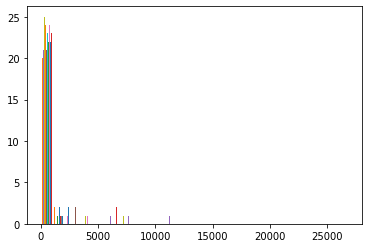

In [10]:
numerics = df.select_dtypes(np.number)
plt.hist(numerics, bins=25)
plt.show()

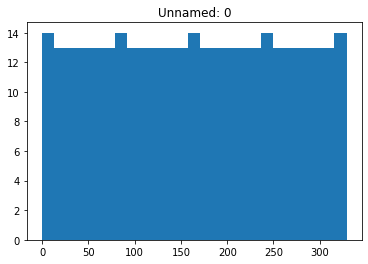

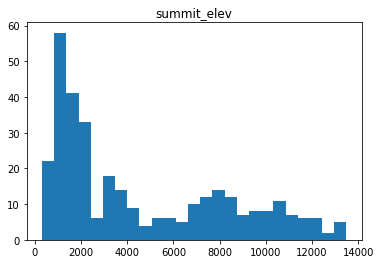

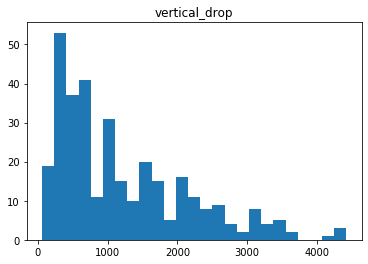

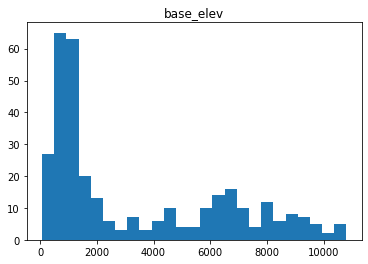

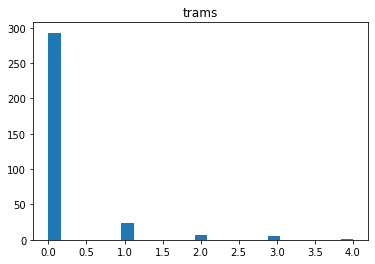

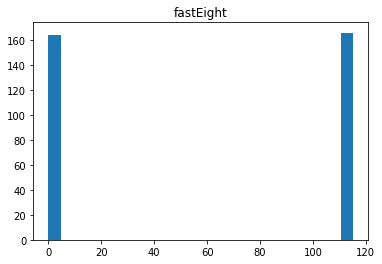

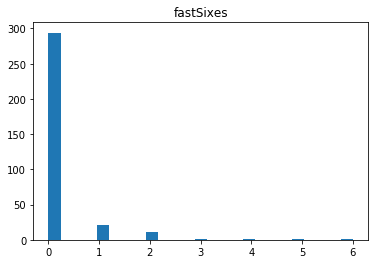

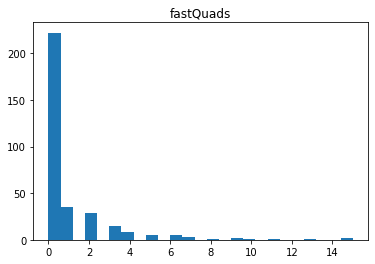

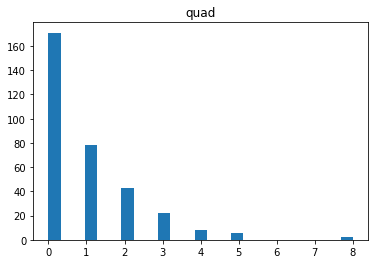

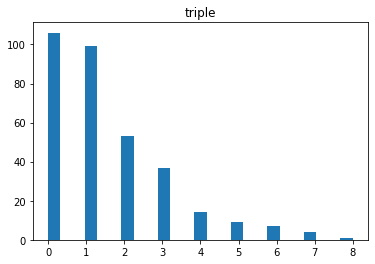

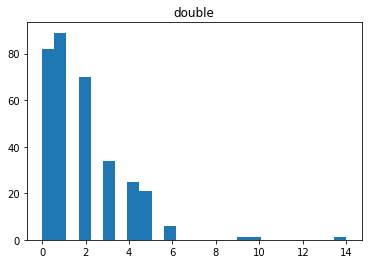

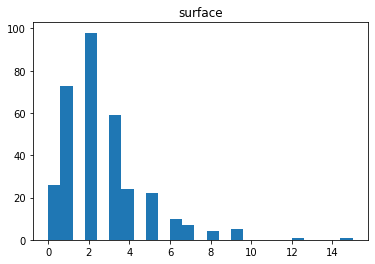

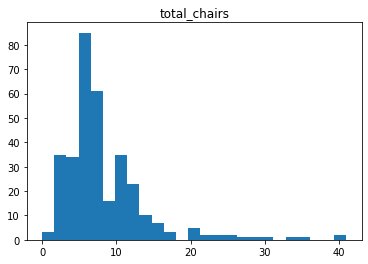

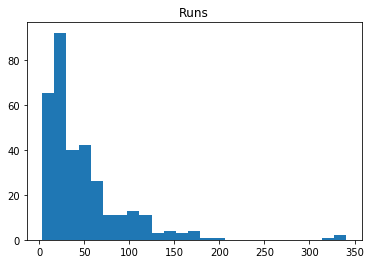

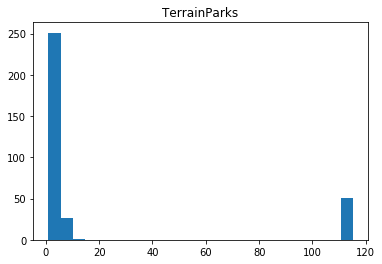

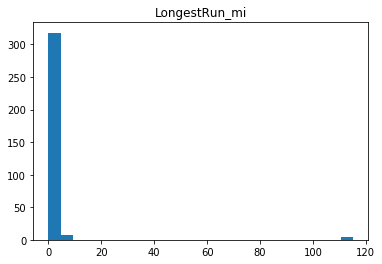

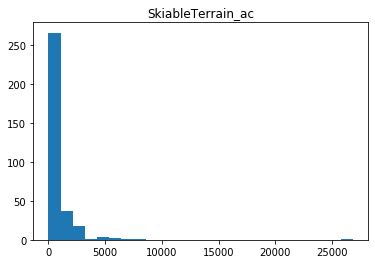

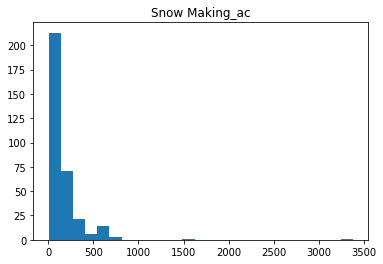

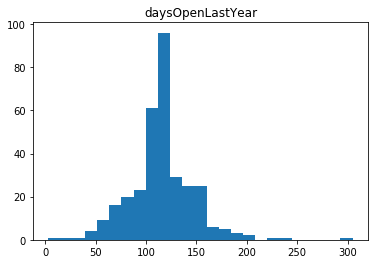

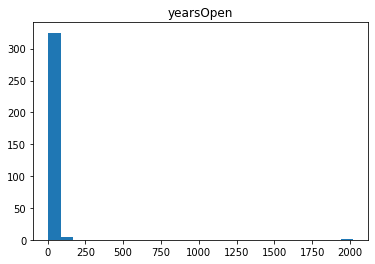

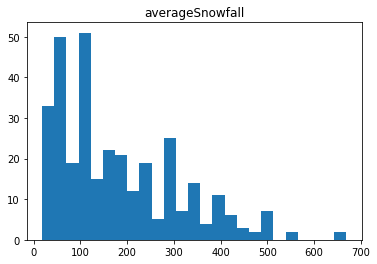

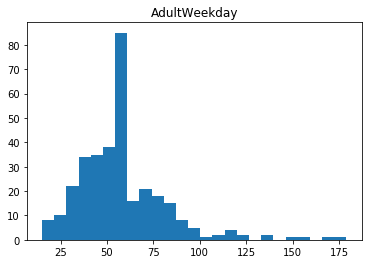

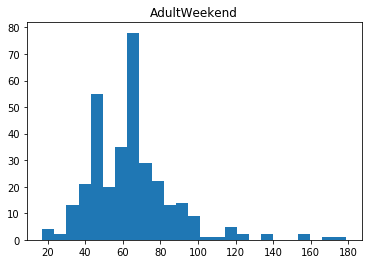

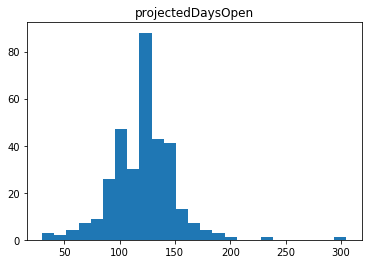

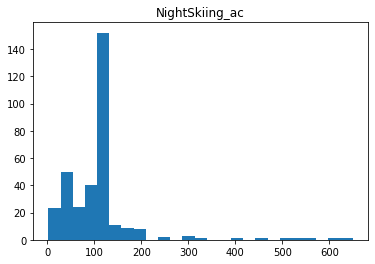

In [11]:
for cols in numerics:
    col = numerics[cols]
    plt.hist(col, bins=25)
    plt.title(str(col.name))
    plt.show()

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

[Text(0, 0, 'Alaska'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Idaho'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Maine'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Montana'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'New Hampshire'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'New Mexico'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'North Carolina'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Rhode Island'),
 Text(0, 0, 'South Dakota'),
 Text(0, 0, 'Tennessee'),
 Text(0, 0, 'Utah'),
 Text(0, 0, 'Vermont'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Washington'),
 Text(0, 0, 'West Virginia'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Wyoming')]

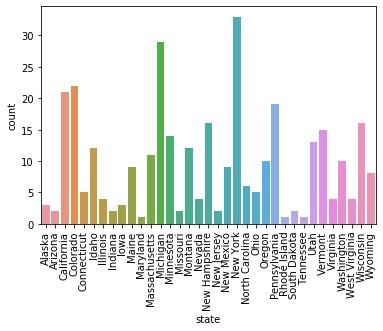

In [13]:
state_countplot = sns.countplot(x=df['state'])
state_countplot.set_xticklabels(labels = df['state'].unique(), rotation=90)

[Text(0, 0, 'Alaska'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'Northern California'),
 Text(0, 0, 'Sierra Nevada'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Idaho'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Maine'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Montana'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'New Hampshire'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'New Mexico'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'North Carolina'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'Mt. Hood'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Rhode Island'),
 Text(0, 0, 'South Dakota'),
 Text(0, 0, 'Tennessee'),
 Text(0, 0, 'Salt Lake City'),
 Text(0, 0, 'Utah'),
 Text(0, 0, 'Vermont'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Washington'),
 Text(0, 0, 'West Virginia'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Wyoming')]

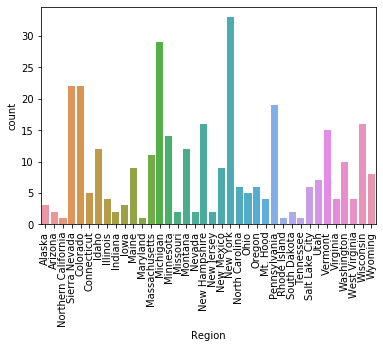

In [17]:
region_countplot = sns.countplot(x=df['Region'])
region_countplot.set_xticklabels(labels = df['Region'].unique(), rotation=90)

**<font color='teal'>Region Levels Plot</font>**

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [18]:
df.drop(labels="Region", axis=1)

,Unnamed: 0,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,0,Alyeska Resort,Alaska,3939,2500,250,1,0.000000,0,2,2,0,0,2,7,76.0,2.000000,1.0,1610.0,113.000000,150.000000,60.0,669.000000,65.000000,85.00000,150.000000,550.000000
1,1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.000000,0,0,0,0,4,0,4,36.0,1.000000,2.0,640.0,60.000000,45.000000,44.0,350.000000,47.000000,53.00000,90.000000,115.103943
2,2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.000000,0,0,0,1,0,2,3,13.0,1.000000,1.0,30.0,30.000000,150.000000,36.0,69.000000,30.000000,34.00000,152.000000,30.000000
3,3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.000000,1,0,2,2,1,2,8,55.0,4.000000,2.0,777.0,104.000000,122.000000,81.0,260.000000,89.000000,89.00000,122.000000,115.103943
4,4,Sunrise Park Resort,Arizona,11100,1800,9200,0,115.103943,0,1,2,3,1,0,7,65.0,2.000000,1.2,800.0,80.000000,115.000000,49.0,250.000000,74.000000,78.00000,104.000000,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325,Meadowlark Ski Lodge,Wyoming,9500,1000,8500,0,115.103943,0,0,0,1,1,1,3,14.0,1.000000,1.5,300.0,115.103943,115.103943,9.0,115.103943,57.916957,64.16681,120.053004,115.103943
326,326,Sleeping Giant Ski Resort,Wyoming,7428,810,6619,0,0.000000,0,0,0,1,1,1,3,48.0,1.000000,1.0,184.0,18.000000,61.000000,81.0,310.000000,42.000000,42.00000,77.000000,115.103943
327,327,Snow King Resort,Wyoming,7808,1571,6237,0,115.103943,0,0,1,1,1,0,3,32.0,2.000000,1.0,400.0,250.000000,121.000000,80.0,300.000000,59.000000,59.00000,123.000000,110.000000
328,328,Snowy Range Ski & Recreation Area,Wyoming,9663,990,8798,0,0.000000,0,0,0,1,3,1,5,33.0,2.000000,0.7,75.0,30.000000,131.000000,59.0,250.000000,49.000000,49.00000,120.053004,115.103943


## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

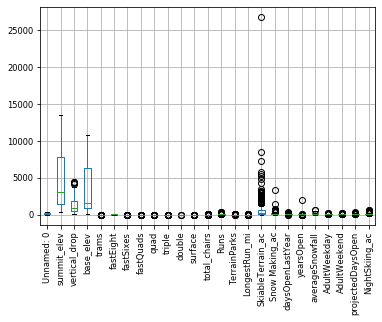

In [19]:
df.boxplot(fontsize='small', rot=90)

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

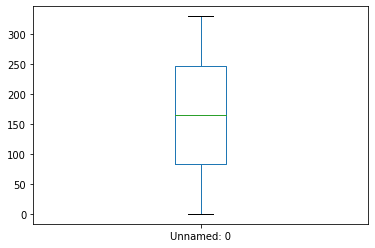

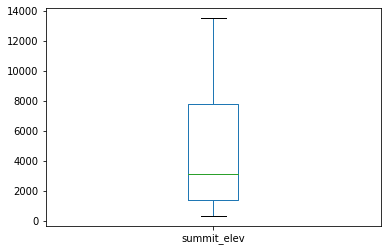

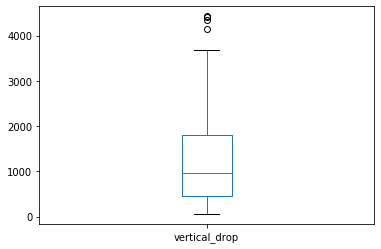

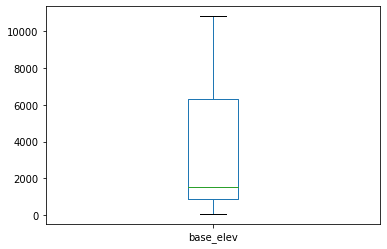

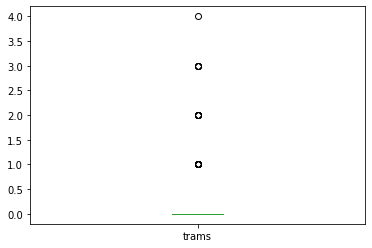

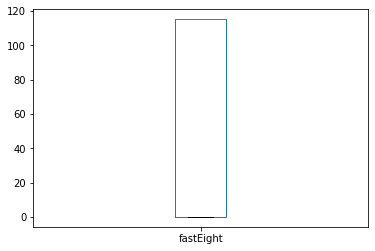

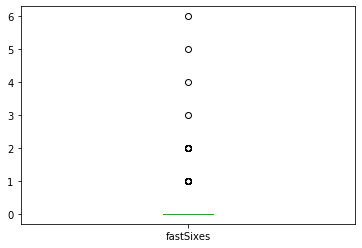

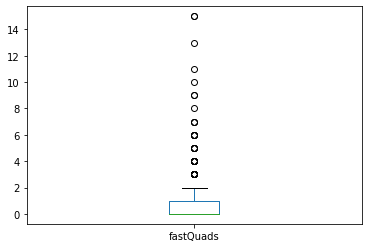

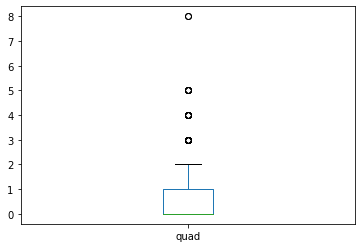

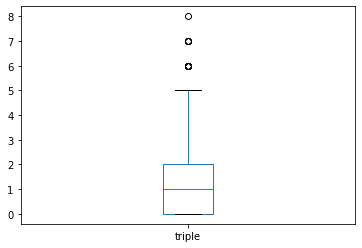

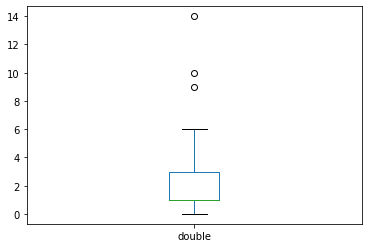

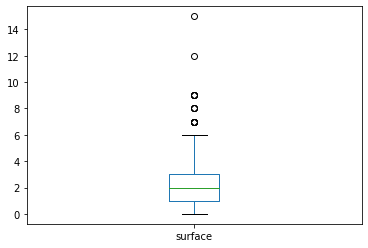

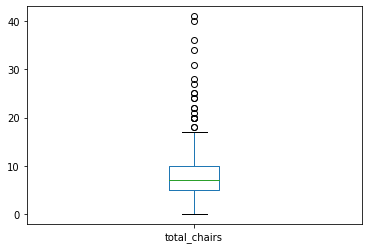

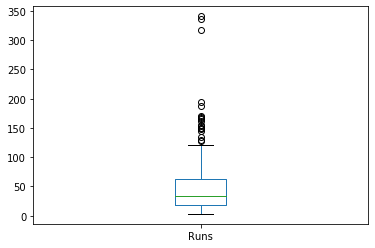

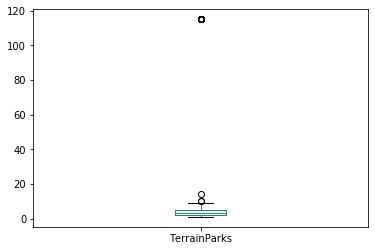

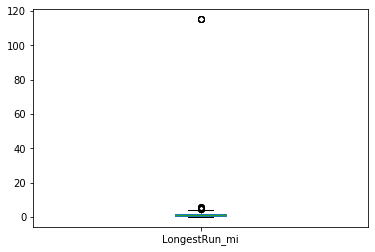

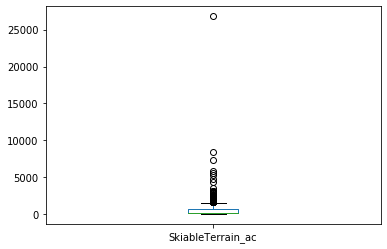

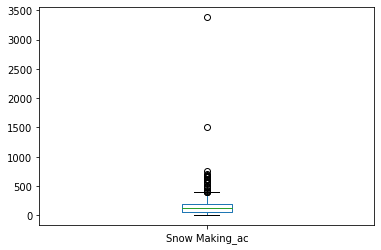

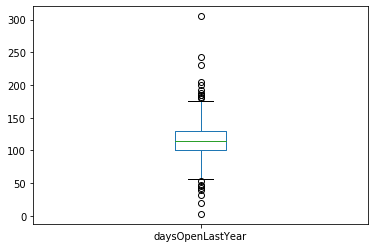

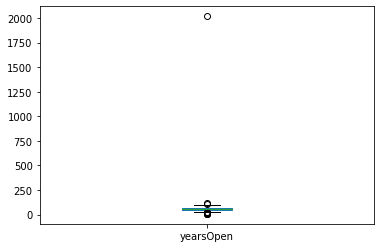

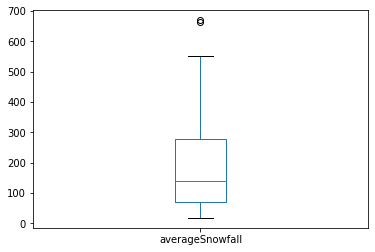

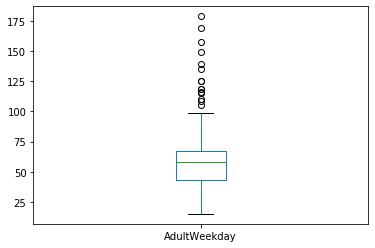

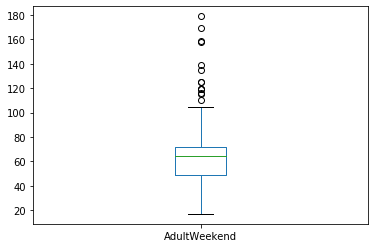

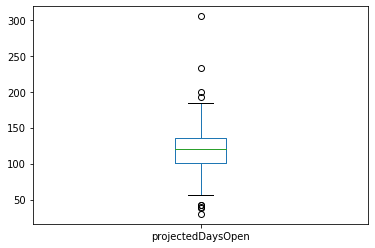

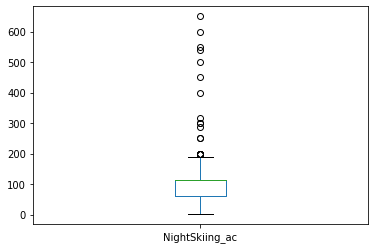

In [25]:
for column in numerics:
    plt.figure()
    numerics[column].plot.box()

In [29]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3-Q1 
inIQR = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [30]:
inIQR.head()

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.000000,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.0,34.0,152.0,30.000000
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,115.103943,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.0,78.0,104.0,80.000000
5,5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.000000,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,115.103943,110.000000,84.0,300.0,47.0,47.0,107.0,115.103943
9,9,Dodge Ridge,Sierra Nevada,California,8200,1600,6600,0,0.000000,0,0,1,2,5,4,12,67.0,5.0,2.0,862.0,115.103943,115.103943,69.0,350.0,78.0,78.0,140.0,115.103943
10,10,Donner Ski Ranch,Sierra Nevada,California,8012,750,7031,0,0.000000,0,0,0,1,5,2,8,52.0,2.0,1.5,505.0,60.000000,163.000000,82.0,400.0,75.0,75.0,170.0,115.103943


There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

In [35]:
inIQR['AdultWeekday'].describe()

count    139.00000
mean      51.79924
std       16.26749
min       17.00000
25%       40.00000
50%       50.00000
75%       59.00000
max       89.00000
Name: AdultWeekday, dtype: float64

In [36]:
inIQR['AdultWeekend'].describe()

count    139.000000
mean      58.664568
std       15.081290
min       30.000000
25%       47.000000
50%       58.000000
75%       69.000000
max       93.000000
Name: AdultWeekend, dtype: float64

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

In [33]:
inIQR['daysOpenLastYear'].describe()

count    139.000000
mean     106.152394
std       21.422812
min       56.000000
25%       95.500000
50%      110.000000
75%      115.551971
max      163.000000
Name: daysOpenLastYear, dtype: float64

In [41]:
inIQR['projectedDaysOpen'].describe()

count    139.000000
mean     112.293490
std       20.991163
min       56.000000
25%      100.000000
50%      115.000000
75%      124.000000
max      180.000000
Name: projectedDaysOpen, dtype: float64

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

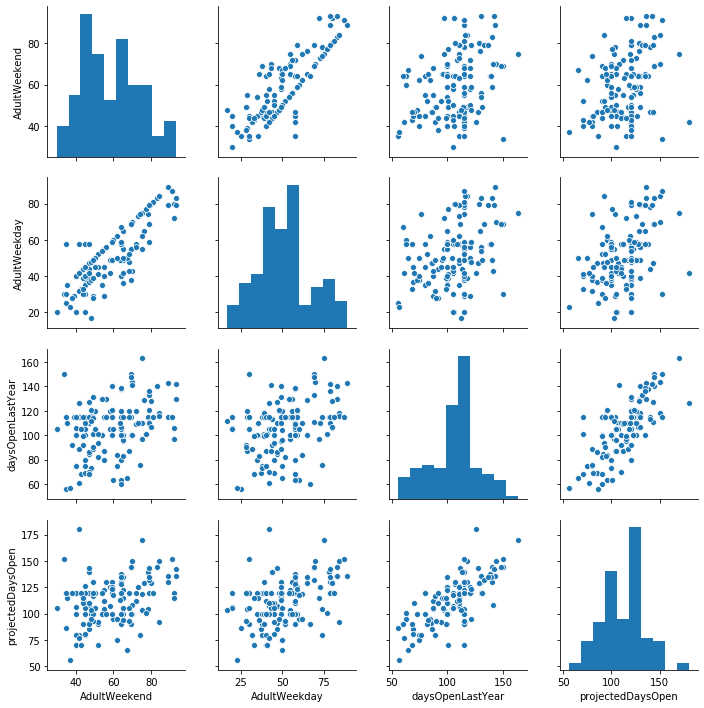

In [40]:
sns.pairplot(inIQR[['AdultWeekend', 'AdultWeekday', 'daysOpenLastYear', 'projectedDaysOpen']])

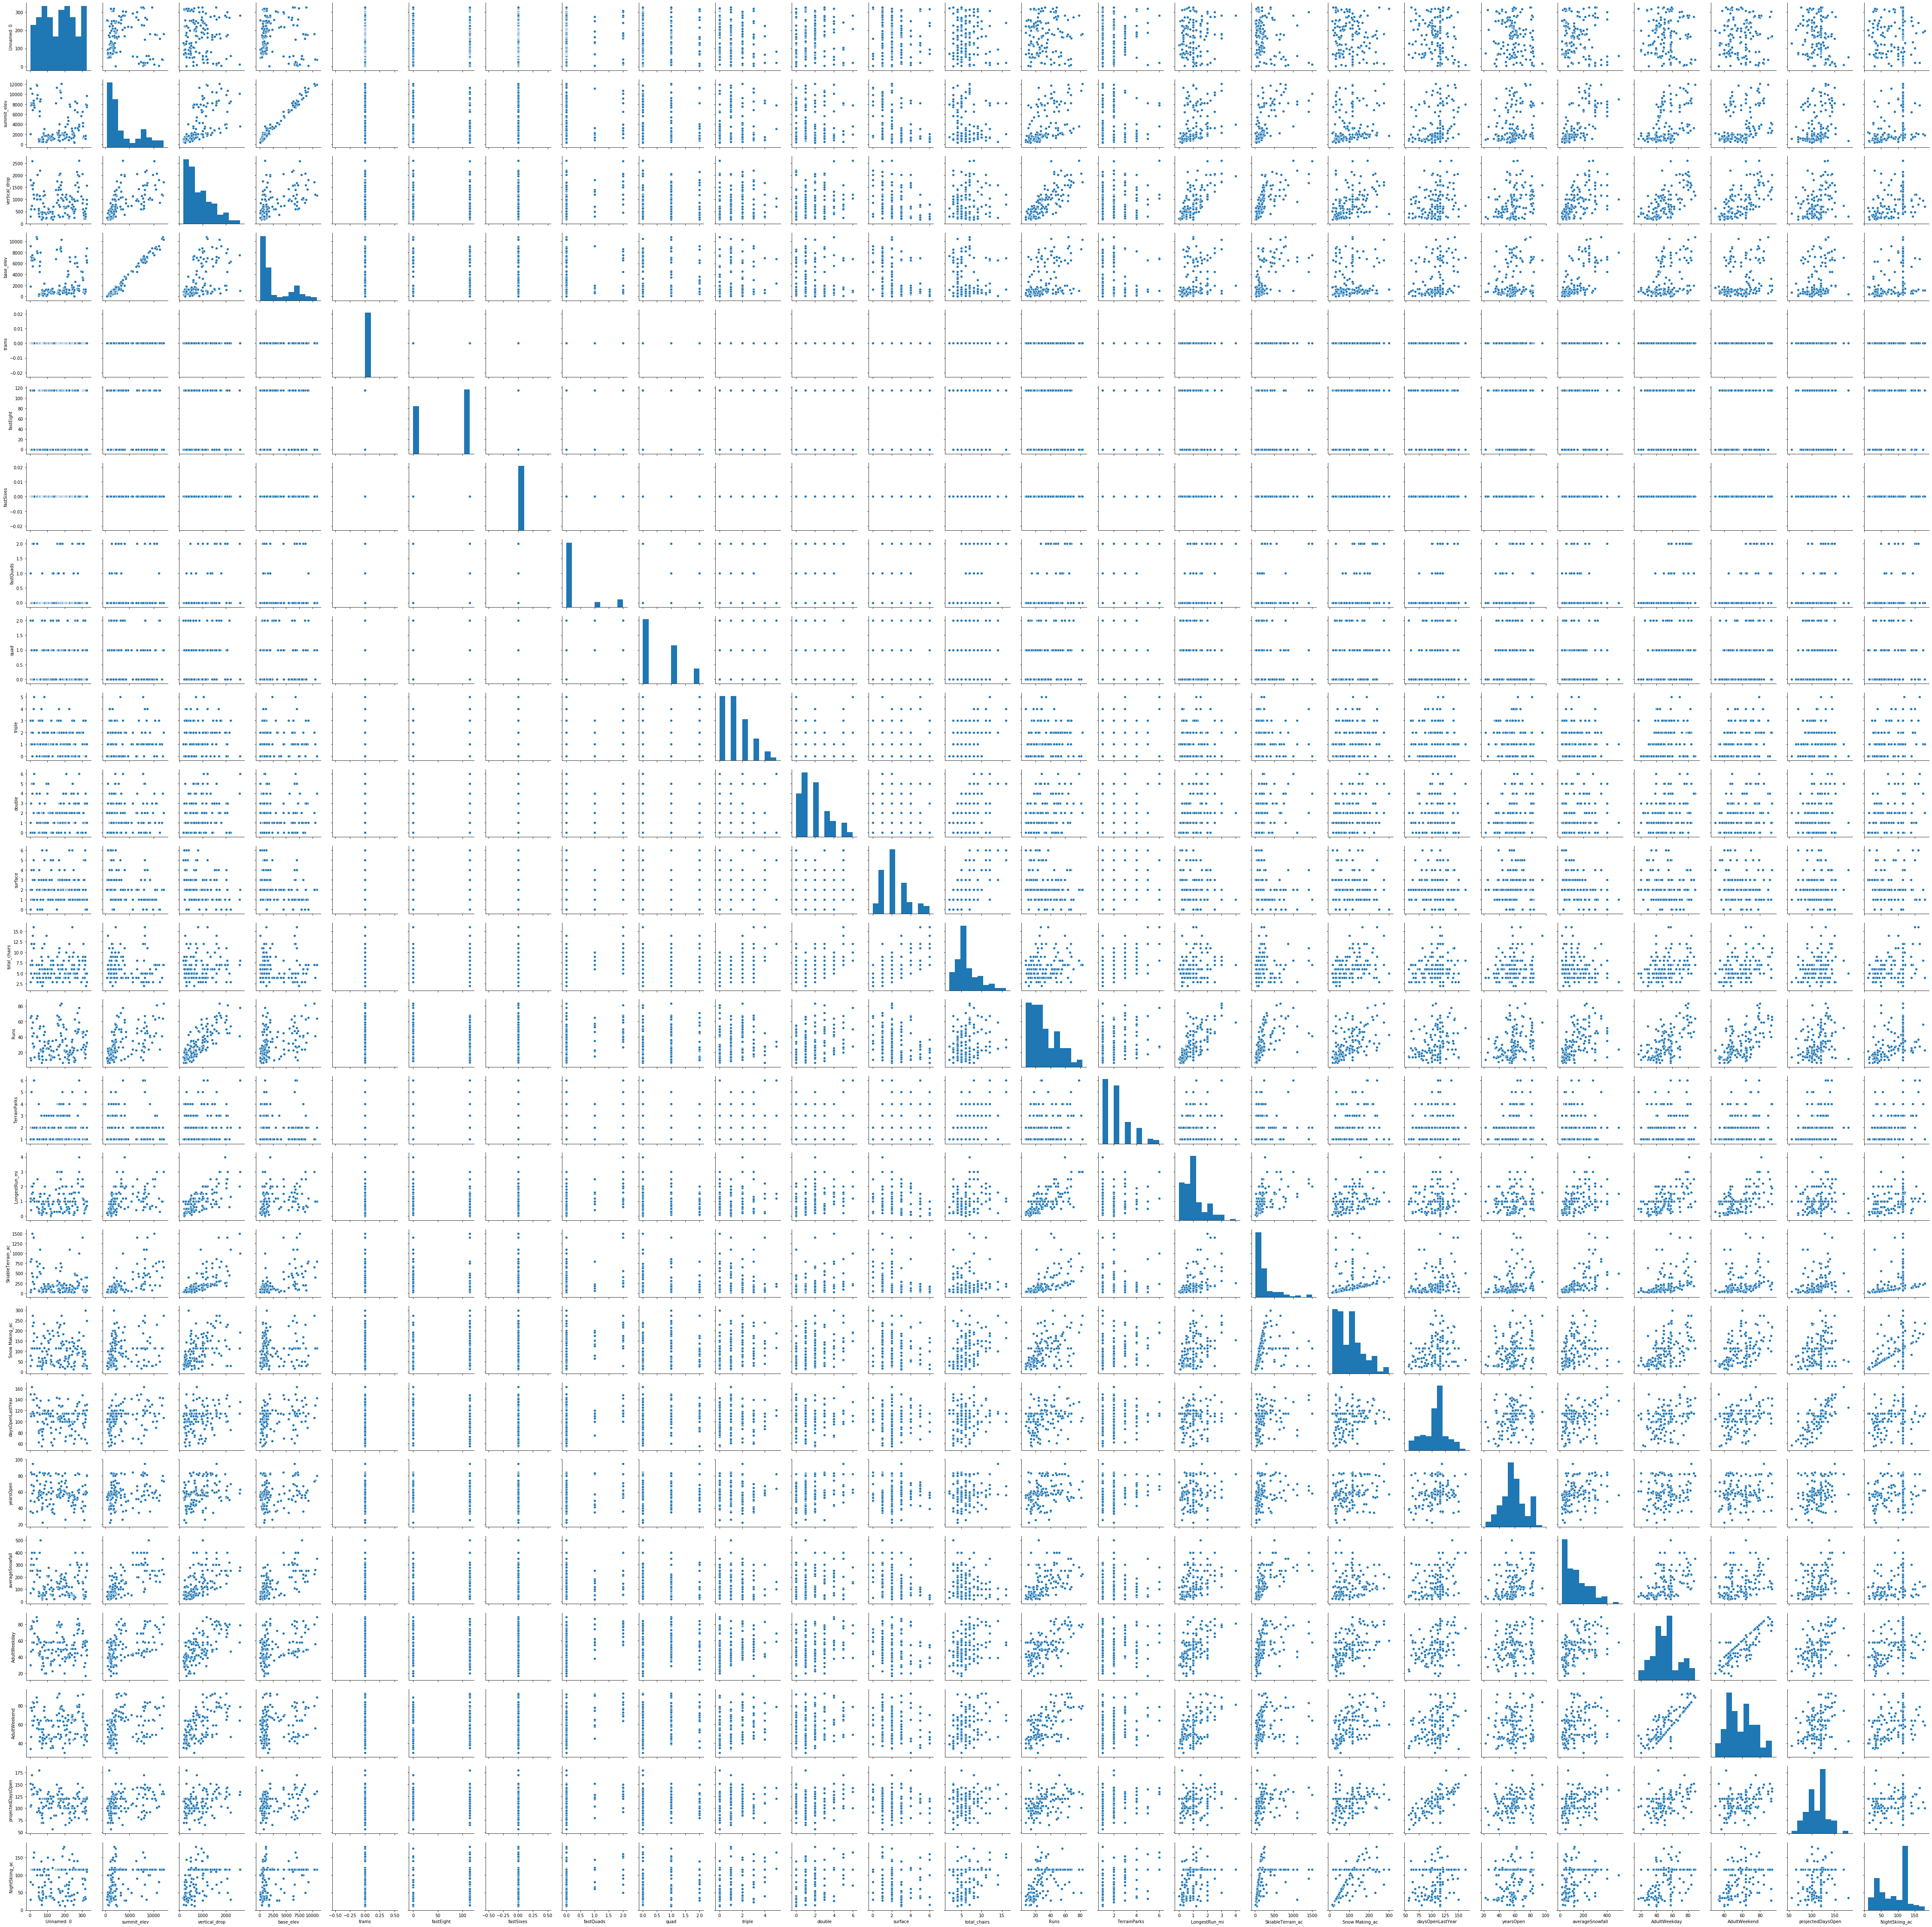

In [48]:
sns.pairplot(inIQR)

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

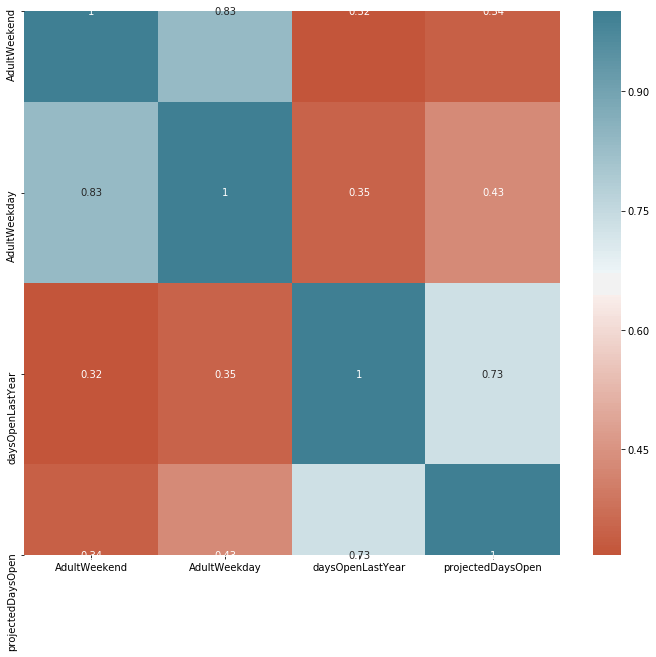

In [55]:
plt.figure(figsize=(12,10))
varList = ['AdultWeekend', 'AdultWeekday', 'daysOpenLastYear', 'projectedDaysOpen']
corr1 = inIQR[varList].corr()
ax = sns.heatmap(corr1, cmap = sns.diverging_palette(20, 220, n=200), annot=True)

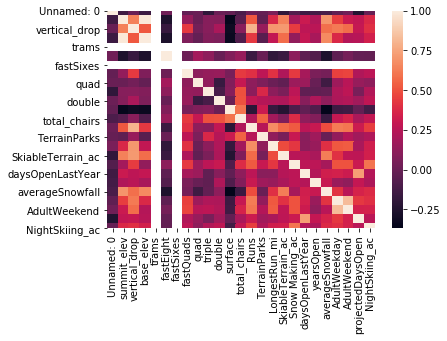

In [57]:
sns.heatmap(inIQR.corr())

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [56]:
cor_target1 = abs(corr[varList])
relevant_features1 = cor_target1[cor_target1>0.5]
relevant_features1

,AdultWeekend,AdultWeekday,daysOpenLastYear,projectedDaysOpen
AdultWeekend,1.000000,0.834032,NaN,NaN
AdultWeekday,0.834032,1.000000,NaN,NaN
daysOpenLastYear,NaN,NaN,1.000000,0.731784
projectedDaysOpen,NaN,NaN,0.731784,1.000000


In [64]:
cor = inIQR.corr()

cor_targetAWD = abs(cor["AdultWeekday"])

relevant_featuresAWD = cor_targetAWD[cor_targetAWD>0.5]


cor_targetAWE = abs(cor["AdultWeekend"])

relevant_featuresAWE = cor_targetAWE[cor_targetAWE>0.5]


cor_targetDO = abs(cor["daysOpenLastYear"])

relevant_featuresDO = cor_targetDO[cor_targetDO>0.5]


cor_targetPDO = abs(cor["projectedDaysOpen"])

relevant_featuresPDO = cor_targetPDO[cor_targetPDO>0.5]


daysOpenLastYear     0.731784
projectedDaysOpen    1.000000
Name: projectedDaysOpen, dtype: float64

In [68]:
print(relevant_featuresAWD)
print()
print(relevant_featuresAWE)
print()
print(relevant_featuresDO)
print()
print(relevant_featuresPDO)
print()

vertical_drop     0.616789
Runs              0.623755
LongestRun_mi     0.522243
Snow Making_ac    0.505353
AdultWeekday      1.000000
AdultWeekend      0.834032
Name: AdultWeekday, dtype: float64

vertical_drop     0.580853
Runs              0.605438
LongestRun_mi     0.532553
Snow Making_ac    0.505538
AdultWeekday      0.834032
AdultWeekend      1.000000
Name: AdultWeekend, dtype: float64

daysOpenLastYear     1.000000
projectedDaysOpen    0.731784
Name: daysOpenLastYear, dtype: float64

daysOpenLastYear     0.731784
projectedDaysOpen    1.000000
Name: projectedDaysOpen, dtype: float64



Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [76]:
from sklearn.cluster import KMeans
x = inIQR.drop(['Name','state','Region'], axis =1).values

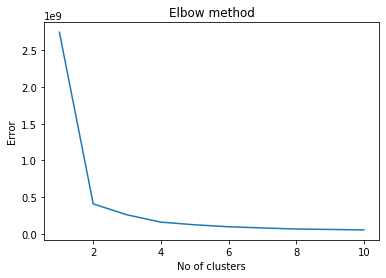

In [77]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

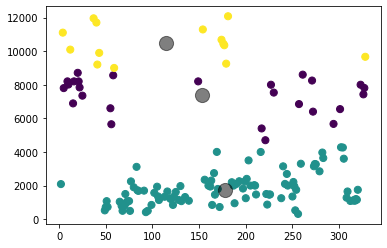

In [81]:
kmeansAlg = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=3)
kmeansAlg.fit(x)
y_kmeans = kmeansAlg.predict(x)

plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeansAlg.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

TypeError: scatter() missing 1 required positional argument: 'y'

In [99]:
xFrame = pd.DataFrame(x)
clusterFrame = pd.DataFrame(centers)

step3df = pd.concat([xFrame, clusterFrame], axis=1)

In [102]:
step3_output1 = step3df

In [105]:
step3_output1.to_csv('/Users/kev_weis/Desktop/GuidedCapstone2/data/step3_output1.csv')

In [106]:
step3_output2 = inIQR
step3_output2.to_csv('/Users/kev_weis/Desktop/GuidedCapstone2/data/step3_output2.csv')